# University Dataset

## Contexto

Você irá ajudar a administração de um departamento de uma universidade em análises sobre a qualidade dos cursos oferecidos, a satisfação dos alunos com os professores e questões demográficas sobre os alunos. 

**Seu cliente não tem muita formação técnica**, então faz parte do seu desafio transmitir insights claros para uma pessoa de área de negócios. 

Base de dados: https://relational.fit.cvut.cz/dataset/university

## Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mysql.connector

## Carregar base de dados

In [3]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="*************",
  database="university"
)

print(mydb)

In [4]:
course = pd.read_sql_query('SELECT * FROM course', mydb)
prof = pd.read_sql_query('SELECT * FROM prof', mydb)
ra = pd.read_sql_query('SELECT * FROM ra', mydb)
registration = pd.read_sql_query('SELECT * FROM registration', mydb)
student = pd.read_sql_query('SELECT * FROM student', mydb)

## Entendimento dos dados

### Course

Informações sobre os cursos da universidade

Feature | Descrição | Range
------- | ----------| :----------:
course_id | Código de identificação do curso | 4 - 13
rating | Nota do curso | 1 - 2
diff | Nível de dificuldade do curso | 1 - 2

In [5]:
course.head()

,course_id,rating,diff
0,4,2,1
1,5,2,2
2,6,2,1
3,7,2,2
4,8,2,1


In [6]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   course_id  10 non-null     int64 
 1   rating     10 non-null     object
 2   diff       10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [7]:
course[['rating', 'diff']] = course[['rating', 'diff']].astype('int64')

In [8]:
course.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,10.0,8.5,3.027650,4.0,6.25,8.5,10.75,13.0
rating,10.0,1.7,0.483046,1.0,1.25,2.0,2.00,2.0
diff,10.0,1.5,0.527046,1.0,1.00,1.5,2.00,2.0


### Professor
Informações sobre os professores conforme avaliação dos alunos

Feature | Descrição | Range | Tipo
--------|-----------|:-----: | ----
prof_id | Código de identificação do professor | 4 - 9 | Categórico
popularity | Popularidade do professor | 1 - 2 | Numérico discreto
teachingability | Habilidade de ensino | 2 - 3 | Numérico discreto



In [9]:
prof

,prof_id,popularity,teachingability
0,4,2,3
1,5,2,3
2,6,2,3
3,7,2,2
4,8,1,2
5,9,1,2


In [10]:
prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prof_id          6 non-null      int64 
 1   popularity       6 non-null      object
 2   teachingability  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [11]:
prof[['popularity', 'teachingability']] = prof[['popularity', 'teachingability']].astype('int64')

In [12]:
prof.describe().T

,count,mean,std,min,25%,50%,75%,max
prof_id,6.0,6.500000,1.870829,4.0,5.25,6.5,7.75,9.0
popularity,6.0,1.666667,0.516398,1.0,1.25,2.0,2.00,2.0
teachingability,6.0,2.500000,0.547723,2.0,2.00,2.5,3.00,3.0


### RA
Informações do aluno em relação aos professores

Feature | Descrição | Range
--------|-----------|:-----:
capability | Capacidade do professor | 1 - 5
prof_id | Código de identificação do professor | 4 - 9
student_id | Código de identificação do aluno | 5 - 28
salary | Percepção do aluno sobre o salário do professor | low, med, high

In [13]:
ra.head()

,capability,prof_id,student_id,salary
0,3,4,17,med
1,1,5,5,low
2,2,5,14,low
3,3,5,18,high
4,4,5,26,high


In [14]:
ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   capability  25 non-null     object
 1   prof_id     25 non-null     int64 
 2   student_id  25 non-null     int64 
 3   salary      25 non-null     object
dtypes: int64(2), object(2)
memory usage: 928.0+ bytes


In [15]:
ra['capability'] = ra['capability'].astype('int64')

In [16]:
ra.describe().T

,count,mean,std,min,25%,50%,75%,max
capability,25.0,2.96,1.368698,1.0,2.0,3.0,4.0,5.0
prof_id,25.0,6.28,1.208305,4.0,5.0,6.0,7.0,9.0
student_id,25.0,16.12,7.189808,5.0,10.0,16.0,22.0,28.0


### Registered

Informações de alunos e seus respectivos cursos

Feature | Descrição | Range
------- | --------- | :----:
course_id | Código de identificação do curso | 4 - 13
student_id | Código de identificação do aluno | 4 - 41
grade | Nota do aluno | 1 - 4
sat | Nível de satisfação do aluno | 1 - 3

In [17]:
registration.head()

,course_id,student_id,grade,sat
0,4,4,1,1
1,4,6,1,1
2,4,7,1,1
3,4,12,2,2
4,4,18,2,2


In [18]:
registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   course_id   92 non-null     int64 
 1   student_id  92 non-null     int64 
 2   grade       92 non-null     object
 3   sat         92 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.0+ KB


In [19]:
registration[['grade', 'sat']] = registration[['grade', 'sat']].astype('int64')

In [20]:
registration.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,92.0,8.619565,2.930860,4.0,6.0,9.0,11.0,13.0
student_id,92.0,20.434783,11.716715,4.0,10.0,18.5,30.0,41.0
grade,92.0,2.130435,1.050561,1.0,1.0,2.0,3.0,4.0
sat,92.0,1.782609,0.795952,1.0,1.0,2.0,2.0,3.0


### Student
Informações sobre os alunos

Feature | Descrição | Range
------- | --------- | :-----:
student_id | Código de identificação do aluno | 4 - 41
intelligence | Nível de inteligência do aluno | 1 - 3
ranking | Nível do aluno | 1 - 5

In [21]:
student.head()

,student_id,intelligence,ranking
0,4,3,1
1,5,3,1
2,6,3,2
3,7,3,1
4,8,3,1


In [22]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   student_id    38 non-null     int64 
 1   intelligence  38 non-null     object
 2   ranking       38 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


In [23]:
student[['intelligence', 'ranking']] = student[['intelligence', 'ranking']].astype('int64')

In [24]:
student.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,38.0,22.500000,11.113055,4.0,13.25,22.5,31.75,41.0
intelligence,38.0,1.921053,0.818092,1.0,1.00,2.0,3.00,3.0
ranking,38.0,2.973684,1.460967,1.0,2.00,3.0,4.00,5.0


## Demandas do negócio

- Plotar a média de rating por curso;
- Plotar a média de popularidade por professor e a quantidade de estudantes associados a esse mesmo professor, num mesmo gráfico;
- Analisar a relação entre rating do curso e avaliação do salário do professor, apenas para alunos cadastrados em algum curso;
- Analisar a relação entre inteligência do aluno e satisfação com o curso.

Use gráficos e tabelas para montar visualizações para público de áreas de negócio, ou seja, use todos conceitos de visualização de dados que conhecer para transmitir suas observações o melhor possível.

In [25]:
%matplotlib inline
sns.set_theme(font_scale=1.3, style='ticks')

### Média de rating por curso

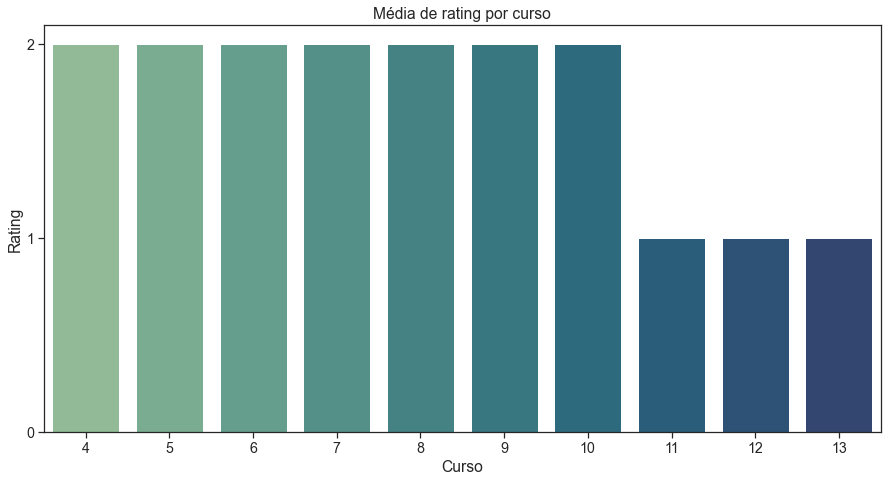

In [26]:

plt.figure(figsize=(15,7.5))

sns.barplot(data=course, 
            x='course_id', 
            y='rating', 
            palette='crest'
            ).set(title='Média de rating por curso', 
                  xlabel='Curso', 
                  ylabel='Rating')
            
plt.yticks(np.arange(0,2+1, 1))
plt.show()

Visualizando os dados, a maioria dos cursos possui rating elevado.

### Média de popularidade por professor e a quantidade de estudantes associados

Para melhor visualizar esses dados, é necessário criar uma nova tabela: 
* Agrupar os dados de **RA** em **prof_id** 
* Obter a média da capacidade do professor
* Obter a quantidade de alunos associados ao professor
* Então mercar com os dados de **Prof** em **prof_id**

In [27]:
prof_ra = ra.groupby('prof_id').agg(
    {'capability': 'mean', 
     'student_id': 'count'}
    ).reset_index().merge(prof, on='prof_id')

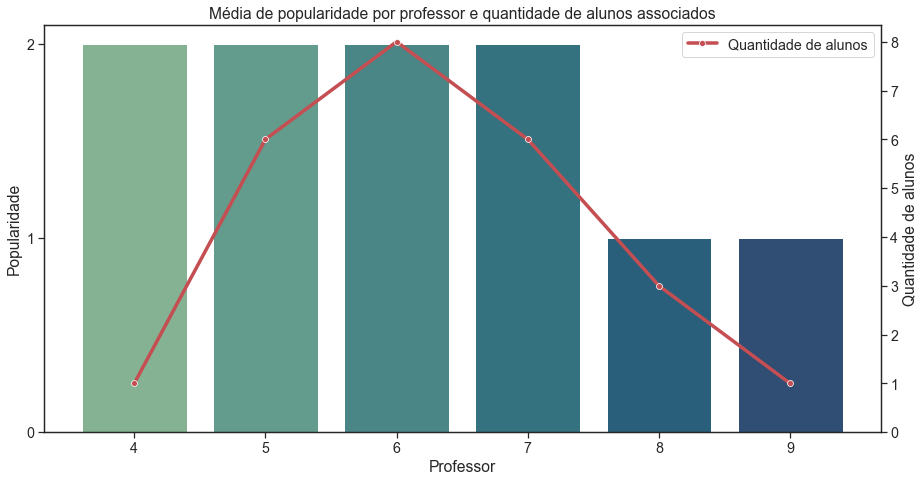

In [28]:
fig, ax = plt.subplots(figsize=(15,7.5))


sns.barplot(data=prof_ra, 
            x='prof_id', 
            y='popularity',
            palette='crest', 
            ax=ax
            ).set(title='Média de popularidade por professor e quantidade de alunos associados', 
                  xlabel='Professor', 
                  ylabel='Popularidade')
            
plt.yticks(np.arange(0,2+1, 1))

ax2 = ax.twinx()         
sns.lineplot(x = prof_ra.index,
             y=prof_ra['student_id'], 
             marker='o', linewidth=3.5, 
             color='r', label='Quantidade de alunos',
             ax=ax2).set(ylabel='Quantidade de alunos')

plt.yticks(np.arange(0,8+1, 1))

plt.show()

É possível perceber que a maioria dos professores são populares, porém dois deles receberam apenas um voto, o que pode levar a uma interpretação errônea do dado.

### Relação entre rating do curso e avaliação do salário do professor, apenas para alunos cadastrados

Para melhor entender esses dados, é necessário criar uma nova tabela com os seguintes dados:
* Na tabela **RA** fazer merge com a tabela **Registration** na coluna **student_id**
* Em seguida realizar outro merge, agora com a tabela **Course** na coluna **course_id**

In [29]:
reg_ra_course = ra.merge(registration[['course_id', 'student_id']], on='student_id').merge(course[['course_id', 'rating']], on='course_id')

c:\Users\bruna\anaconda3\envs\teste\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


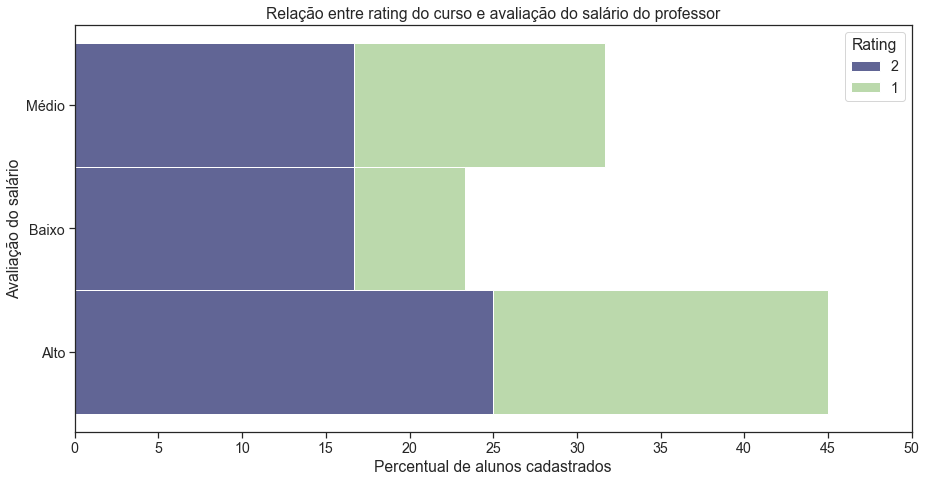

In [30]:
fig, axs = plt.subplots(figsize=(15,7.5))

sns.histplot(data=reg_ra_course, 
             hue='rating', 
             y='salary', multiple='stack', stat='percent',
             palette='crest',
             ax=axs).set(title='Relação entre rating do curso e avaliação do salário do professor', 
                         ylabel='Avaliação do salário', xlabel='Percentual de alunos cadastrados')


plt.xticks(np.arange(0,50+1, 5))
plt.legend(title='Rating', labels=[2,1])
axs.set_yticklabels(['Médio', 'Baixo', 'Alto'])

plt.show()

É possível notar que o rating elevado dos cursos aumenta conforme o aumento da avaliação do salário do professor, de acordo com os alunos cadastrados.

### Relação entre inteligência do aluno e satisfação com o curso

Para melhor avaliar esses dados, é necessário criar uma nova tabela:
* Na tabela **Registration**, fazer merge com a tabela **Student** em **student_id**

In [31]:
reg_student = registration.merge(student[['student_id', 'intelligence']], on='student_id')

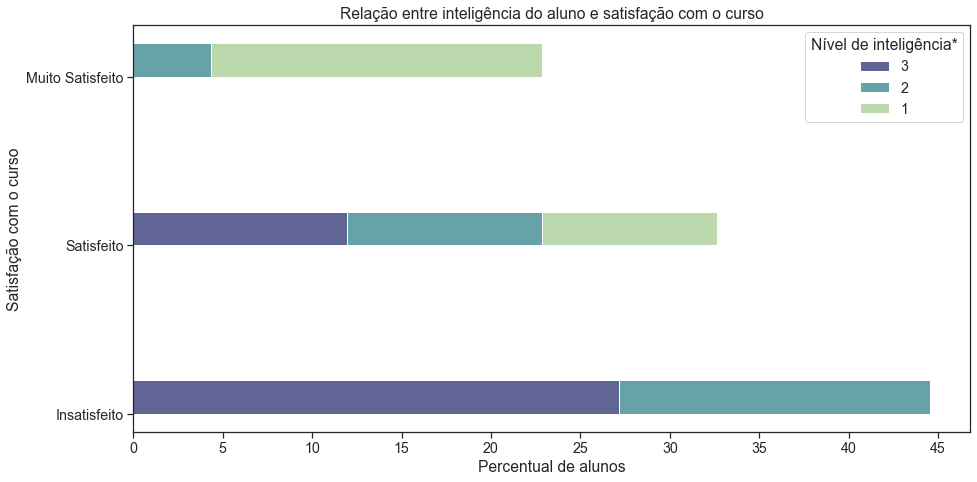

In [32]:
fig, axs = plt.subplots(figsize=(15,7.5))

sns.histplot(data=reg_student, 
             hue='intelligence', 
             y='sat', multiple='stack', stat='percent',
             binwidth=0.19999999999,
             palette='crest',
             ax=axs).set(title='Relação entre inteligência do aluno e satisfação com o curso', 
                         ylabel='Satisfação com o curso', xlabel='Percentual de alunos')

plt.yticks(np.arange(1,3+1, 1))
plt.xticks(np.arange(0,45+1, 5))
plt.legend(title='Nível de inteligência*', labels=[3,2,1])
axs.set_yticklabels(['Insatisfeito', 'Satisfeito', 'Muito Satisfeito'])

plt.show()